In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
from transformers import BertTokenizer, BertForSequenceClassification, BertModel, BertPreTrainedModel, DistilBertTokenizer, DistilBertModel, DistilBertPreTrainedModel
from sklearn.metrics import mean_squared_error, cohen_kappa_score

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [3]:
df2 = pd.read_csv("clean_df.csv").drop(columns=["Unnamed: 0"])
df2

,essay_id,essay_set,essay,num_grammatical_errors,lexical_repetition_ratio,unique_lemmas_count,avg_sentence_length,discourse_connective_count,vocabulary_richness,semantic_relevance,flesch_reading_ease,flesch_kincaid_grade,overall_score,scaled_score,cleaned_essay
0,1,1,"dear local newspaper, i think effects computer...",17,0.523810,95,24.687500,8,0.666667,0.835594,74.02,8.5,8.0,0.600000,"dear local newspaper, i think effects computer..."
1,2,1,"dear @caps1 @caps2, i believe that using compu...",24,0.606557,105,22.800000,8,0.591549,0.851565,67.08,9.1,9.0,0.700000,"dear @caps1 @caps2, i believe that using compu..."
2,3,1,"dear, @caps1 @caps2 @caps3 more and more peopl...",14,0.508333,75,20.400000,4,0.697674,0.891696,68.20,8.7,7.0,0.500000,"dear, @caps1 @caps2 @caps3 more and more peopl..."
3,4,1,"dear local newspaper, @caps1 i have found that...",29,0.600000,155,21.333333,11,0.656250,0.826223,60.24,9.7,10.0,0.800000,"dear local newspaper, @caps1 i have found that..."
4,5,1,"dear @location1, i know having computers has a...",18,0.631285,102,17.266667,9,0.594470,0.868435,72.66,7.0,8.0,0.600000,"dear @location1, i know having computers has a..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12972,21626,8,in most stories mothers and daughters are eit...,19,0.575472,188,23.243902,19,0.627072,0.794858,65.09,12.0,35.0,0.583333,in most stories mothers and daughters are eit...
12973,21628,8,i never understood the meaning laughter is th...,44,0.701357,110,16.282051,7,0.550000,0.791210,91.11,4.0,32.0,0.533333,i never understood the meaning laughter is th...
12974,21629,8,"when you laugh, is @caps5 out of habit, or is ...",14,0.537143,220,21.222222,17,0.745509,0.766729,69.11,8.3,40.0,0.666667,"when you laugh, is @caps5 out of habit, or is ..."
12975,21630,8,trippin' on fen...,6,0.574766,127,17.076923,21,0.663793,0.819285,81.83,5.5,40.0,0.666667,trippin' on fen...


In [ ]:
# def count_words(text):
#     # Split the text by whitespace and count the words
#     words = text.split()
#     return len(words)

In [ ]:
# unwanted_chars = [
#     '\x9d', '¦', '¬', '®', '°', '¶', '¼', '½',
#     'Â', 'Ã', 'á', 'â', 'í', 'ü', 'œ', '˜',
#     '€', '™'
# ]

# # Create a regular expression pattern for unwanted characters
# pattern = '[' + ''.join(unwanted_chars) + ']'

# # Define a function to clean the essay
# def clean_essay(essay):
#     return re.sub(pattern, '', essay).lower()

In [ ]:
# import re
# df = df2.copy()
# df['essay'] = df2['essay'].apply(clean_essay)

In [6]:
# df.isna().sum()

In [ ]:
# df.to_csv("clean_df_normalization.csv")

In [ ]:
# un_chars = set()

In [ ]:
# import re
# import string

# def find_unusual_characters(essay):
#     # Define allowed characters: letters, digits, punctuation, and whitespace
#     allowed_chars = (
#         string.ascii_letters +
#         string.digits +
#         string.punctuation +  # This includes @, #, $, etc.
#         " "  # Include space +
#         '”' +
#         '“'+
#         '‘' +
#         '’' +
#         '—' +
#         '…' +
#         '–'
#     )

#     # Collect unusual characters
#     unusual_chars = set(c for c in essay if c not in allowed_chars)

#     return unusual_chars
# # Example essay
# essay = "This is a sample essay with some unusual characters: 😊, ©, #, and @."

# # Check for unusual characters
# unusual_characters = find_unusual_characters(essay)

# if unusual_characters:
#     print("Unusual characters found:", unusual_characters)
# else:
#     print("No unusual characters found.")


Unusual characters found: {'😊', '©'}


In [ ]:
# for index, essay in enumerate(df2["essay"]):
#     unusual_chars = find_unusual_characters(essay)
#     if unusual_chars:
#         print("Unusual characters found:", unusual_chars)
#         print(df2["essay"][index])
#         print(df2["essay_set"][index])
#         un_chars.update(unusual_chars)

# 'â', '\x9d', 'œ', '€', '™'

Unusual characters found: {'™', 'â', '€'}
@ORGANIZATION1, With the recent development @MONEY1 technology in todays society I know that there is a lot @MONEY1 controversy with computers. Many people believe that computers are positive towards our society. While others disagree. I feel that technology can be both good and bad. Technology provides great advancements in our world. But people experience less @MONEY1 the outside world when they surround themselves with technology. But I feel that we can find a balance between the two views. Having computers has brought a lot @MONEY1 advancement in todays society. Look at modern medicine, it would be nothing without todays technology in computers. We can look at todays military. Computers practically run todays armed forces. But who knows where technology can take us. Our society could continue to greatly advance with the help @MONEY1 computers. But then again we could all wonder where would we be today without computers. So @ORGANIZATION1, a

('â', '\x9d', 'œ', '€', '™')

In [ ]:
# import nltk
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize

# # Make sure to download the stopwords if you haven't already
# nltk.download('punkt')
# nltk.download('stopwords')

# def count_stop_words(essay):
#     # Define the set of English stop words
#     stop_words = set(stopwords.words('english'))

#     # Tokenize the essay into words
#     words = word_tokenize(essay.lower())  # Convert to lowercase for uniformity

#     # Count the stop words
#     stop_word_count = sum(1 for word in words if word in stop_words)

#     return stop_word_count

# # Example usage:
# essay_text = "This is an example essay that includes some stop words."
# stop_word_count = count_stop_words(essay_text)
# print("Number of stop words:", stop_word_count)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Number of stop words: 5


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
un_chars

{'\x9d',
 '¦',
 '¬',
 '®',
 '°',
 '¶',
 '¼',
 '½',
 'Â',
 'Ã',
 'á',
 'â',
 'í',
 'ü',
 'œ',
 '˜',
 '€',
 '™'}

In [7]:
df2.columns

Index(['essay_id', 'essay_set', 'essay', 'num_grammatical_errors',
       'lexical_repetition_ratio', 'unique_lemmas_count',
       'avg_sentence_length', 'discourse_connective_count',
       'vocabulary_richness', 'semantic_relevance', 'flesch_reading_ease',
       'flesch_kincaid_grade', 'overall_score', 'scaled_score',
       'cleaned_essay'],
      dtype='object')

In [8]:
df2.isna().sum()

,0
essay_id,0
essay_set,0
essay,0
num_grammatical_errors,0
lexical_repetition_ratio,0
unique_lemmas_count,0
avg_sentence_length,0
discourse_connective_count,0
vocabulary_richness,0
semantic_relevance,0


In [9]:
df = df2.dropna()
df.isna().sum()

,0
essay_id,0
essay_set,0
essay,0
num_grammatical_errors,0
lexical_repetition_ratio,0
unique_lemmas_count,0
avg_sentence_length,0
discourse_connective_count,0
vocabulary_richness,0
semantic_relevance,0


In [10]:
features = df[['essay',
       'num_grammatical_errors', 'lexical_repetition_ratio',
       'unique_lemmas_count', 'avg_sentence_length',
       'discourse_connective_count', 'vocabulary_richness',
       'semantic_relevance', 'flesch_reading_ease', 'flesch_kincaid_grade']]

scores = df[["scaled_score", "overall_score", "essay_set", "essay_id"]]
features, scores

(                                                   essay  \
 0      dear local newspaper, i think effects computer...   
 1      dear @caps1 @caps2, i believe that using compu...   
 2      dear, @caps1 @caps2 @caps3 more and more peopl...   
 3      dear local newspaper, @caps1 i have found that...   
 4      dear @location1, i know having computers has a...   
 ...                                                  ...   
 12972   in most stories mothers and daughters are eit...   
 12973   i never understood the meaning laughter is th...   
 12974  when you laugh, is @caps5 out of habit, or is ...   
 12975                                 trippin' on fen...   
 12976   many people believe that laughter can improve...   
 
        num_grammatical_errors  lexical_repetition_ratio  unique_lemmas_count  \
 0                          17                  0.523810                   95   
 1                          24                  0.606557                  105   
 2                     

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [12]:
train_features, test_features, train_scores, test_scores = train_test_split(features, scores, stratify=scores["essay_set"] , test_size=0.2, random_state=42)
len(train_features), len(test_features), len(train_scores), len(test_scores)

(10381, 2596, 10381, 2596)

In [ ]:
# train_features.to_csv("train_features_with_fs.csv", index=False)
# train_scores.to_csv("train_scores_with_fs.csv", index=False)

In [ ]:
# test_features.to_csv("test_features_with_fs.csv", index=False)
# test_scores.to_csv("test_scores_with_fs.csv", index=False)

In [ ]:
# train_features = pd.read_csv("train_features_with_fs.csv")
# train_scores = pd.read_csv("train_scores_with_fs.csv")
# test_features = pd.read_csv("test_features_with_fs.csv")
# test_scores = pd.read_csv("test_scores_with_fs.csv")

In [14]:
train_essays = train_features["essay"]
test_essays = test_features["essay"]
train_features_extract = train_features.drop("essay", axis=1)
test_features_extract = test_features.drop("essay", axis=1)

In [15]:
test_features_extract

,num_grammatical_errors,lexical_repetition_ratio,unique_lemmas_count,avg_sentence_length,discourse_connective_count,vocabulary_richness,semantic_relevance,flesch_reading_ease,flesch_kincaid_grade
2579,28,0.742857,61,22.529412,3,0.526667,0.861709,79.09,6.6
6011,9,0.354430,60,24.000000,3,0.817073,0.849492,75.24,8.1
5727,6,0.510204,34,27.000000,4,0.741379,0.806169,71.48,9.5
8923,2,0.222222,60,23.571429,2,0.855422,0.814753,50.57,11.3
8858,4,0.618182,34,18.000000,3,0.701754,0.703491,72.56,7.0
...,...,...,...,...,...,...,...,...,...
835,18,0.431818,32,15.142857,1,0.745098,0.774342,82.65,5.2
10709,5,0.404762,30,29.200000,10,0.759259,0.764190,76.90,9.5
11965,10,0.511628,58,14.650000,9,0.775510,0.815188,88.16,5.2
5926,15,0.453608,68,32.571429,8,0.733333,0.880896,68.13,10.8


In [16]:
scaled_features_train = scaler.fit_transform(train_features_extract)
scaled_features_test = scaler.transform(test_features_extract)

In [17]:
scaled_features_train_df = pd.DataFrame(scaled_features_train, columns=train_features_extract.columns)
scaled_features_test_df = pd.DataFrame(scaled_features_test, columns=test_features_extract.columns)


In [18]:
scaled_features_test_df.isna().sum()

,0
num_grammatical_errors,0
lexical_repetition_ratio,0
unique_lemmas_count,0
avg_sentence_length,0
discourse_connective_count,0
vocabulary_richness,0
semantic_relevance,0
flesch_reading_ease,0
flesch_kincaid_grade,0


In [19]:
scaled_features_train_df.isna().sum()


,0
num_grammatical_errors,0
lexical_repetition_ratio,0
unique_lemmas_count,0
avg_sentence_length,0
discourse_connective_count,0
vocabulary_richness,0
semantic_relevance,0
flesch_reading_ease,0
flesch_kincaid_grade,0


In [20]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [21]:
import torch
from torch.utils.data import Dataset, DataLoader
batch_size = 16
class EssayDataset(Dataset):
    def __init__(self, essays, scores, features, tokenizer, max_length=512):
        self.essays = essays.to_list()
        self.scaled_scores = scores["scaled_score"].values.tolist()
        self.original_scores = scores["overall_score"].values.tolist()
        self.meta = scores[['essay_id', 'essay_set']].values.tolist()
        self.features = features.values.tolist()
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.essays)

    def __getitem__(self, idx):
        essay = self.essays[idx]

        scaled_score = self.scaled_scores[idx]
        original_score = self.original_scores[idx]
        meta = self.meta[idx]
        feature = self.features[idx]

        tokens = self.tokenizer(essay, padding='max_length', truncation=True, max_length=self.max_length, return_tensors='pt')

        return {'input_ids': tokens['input_ids'].squeeze().to(device),
        'attention_mask': tokens['attention_mask'].squeeze().to(device),
        'scaled_score': torch.tensor(scaled_score, dtype=torch.float).to(device),
        'original_score': original_score,
        'meta': meta,
        'features': torch.tensor(feature, dtype=torch.float).to(device)}

# Example usage:
train_dataset = EssayDataset(train_essays,
                             train_scores,
                             scaled_features_train_df,
                             tokenizer)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)


In [50]:
import torch.nn as nn
class BertForRegression(BertPreTrainedModel):
    def __init__(self, config):
        super().__init__(config)
        self.bert = BertModel(config)
        input_dim = config.hidden_size + 9
        self.overall_head = nn.Linear(input_dim, 1)
        self.dropout = nn.Dropout(0.1)
        self.batch_norm = nn.BatchNorm1d(input_dim)
        self.overall_head = nn.Linear(input_dim, 1)


    def forward(self, input_ids, attention_mask=None, features = None):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0, :]

        # Concatenate features to the CLS output
        if features is not None:
            # Ensure features are of the right type and on the correct device
            features = features.to(cls_output.device, dtype=cls_output.dtype)
            combined_output = torch.cat((cls_output, features), dim=1)  # Concatenate along the feature dimension
            combined_output = self.batch_norm(combined_output)
        else:
            combined_output = cls_output  # If no features are provided, use only the CLS output
        combined_output = self.dropout(combined_output)
        overall = self.overall_head(combined_output)
        return overall

In [51]:
from transformers import BertConfig
import torch.optim as optim

config = BertConfig.from_pretrained('bert-base-uncased')
model = BertForRegression.from_pretrained('bert-base-uncased', config=config).to(device)
optimizer = optim.AdamW(model.parameters(), lr=1e-5)
criterion = torch.nn.MSELoss()

Some weights of BertForRegression were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['batch_norm.bias', 'batch_norm.num_batches_tracked', 'batch_norm.running_mean', 'batch_norm.running_var', 'batch_norm.weight', 'overall_head.bias', 'overall_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [52]:
test_dataset = EssayDataset(test_essays,
                             test_scores,
                             scaled_features_test_df,
                             tokenizer)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


In [53]:
# # Loading a checkpoint
# checkpoint = torch.load('model_checkpoint_epoch_6.pth')
# model.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# start_epoch = checkpoint['epoch'] + 1  # Resume from the next epoch
#  # Optionally load the loss


In [54]:
# Function to evaluate the model on the validation set
def evaluate(model, test_dataloader, criterion):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in test_dataloader:
            input_ids = batch['input_ids']
            attention_mask = batch['attention_mask']
            scores = batch['scaled_score']
            features = batch["features"]

            outputs = model(input_ids, attention_mask=attention_mask, features=features)

            loss = criterion(outputs.squeeze(), scores.squeeze())
            total_loss += loss.item()
    return total_loss / len(test_dataloader)


In [33]:
# num_epochs = 5
# for epoch in range(num_epochs):
#     model.train()
#     for batch in train_dataloader:
#         input_ids = batch['input_ids']
#         attention_mask = batch['attention_mask']

#         overall_scores = batch["overall_score"]
#         features = batch["features"]

#         optimizer.zero_grad()
#         outputs = model(input_ids, attention_mask=attention_mask, features=features)


#         loss = criterion(outputs.squeeze(), overall_scores.squeeze())
#         # print(loss)

#         loss.backward()

#         optimizer.step()

#     print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')

In [56]:
num_epochs = 8
best_val_loss = float('inf')  # For saving the best model
checkpoint_interval = 2       # Save every 5 epochs

# Lists to store losses for plotting later
# train_losses = checkpoint['train_losses']
# val_losses = checkpoint['val_losses']
train_losses = []
val_losses = []

In [57]:
import torch
import matplotlib.pyplot as plt

for epoch in range(0, 8):
    # Training Phase
    model.train()
    train_loss = 0
    for batch in train_dataloader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        overall_scores = batch["scaled_score"]
        features = batch["features"]

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, features=features)
        loss = criterion(outputs.squeeze(), overall_scores.squeeze())
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)  # Store training loss

    val_loss = evaluate(model, test_dataloader, criterion)
    val_losses.append(val_loss)

    # Print Training and Validation Loss
    print(f'Epoch {epoch + 1}/{num_epochs}')
    print(f'Training Loss: {avg_train_loss:.4f}, Validation Loss: {val_loss:.4f}')

    # # Save model checkpoint every 5 epochs or if validation loss improves
    # if (epoch + 1) % checkpoint_interval == 0 or val_loss < best_val_loss:
    #     print(f"Saving checkpoint at epoch {epoch + 1}")
    #     checkpoint = {
    #         'epoch': epoch + 1,
    #         'model_state_dict': model.state_dict(),
    #         'optimizer_state_dict': optimizer.state_dict(),
    #         'train_losses': train_losses,
    #         'val_losses': val_losses,
    #     }
    #     torch.save(checkpoint, f'model_checkpoint_epoch_{epoch + 1}.pth')
    #     best_val_loss = val_loss  # Update best loss if validation loss improves


Epoch 1/8
Training Loss: 0.4524, Validation Loss: 0.3072
Epoch 2/8
Training Loss: 0.3230, Validation Loss: 0.2057
Epoch 3/8
Training Loss: 0.2401, Validation Loss: 0.1247
Epoch 4/8
Training Loss: 0.1849, Validation Loss: 0.0952
Epoch 5/8
Training Loss: 0.1395, Validation Loss: 0.0720
Epoch 6/8
Training Loss: 0.1087, Validation Loss: 0.0643


KeyboardInterrupt: 

In [59]:
checkpoint = {
      'epoch': 6,
      'model_state_dict': model.state_dict(),
      'optimizer_state_dict': optimizer.state_dict(),
      'train_losses': train_losses,
      'val_losses': val_losses,
  }
torch.save(checkpoint, f'model_checkpoint_epoch_6_with_dropout.pth')
best_val_loss = val_loss  # Update best loss if validation loss improves

In [60]:
train_losses

[0.4524205686590521,
 0.3229653497552284,
 0.2401068464656273,
 0.18490031892534214,
 0.13949162915394928,
 0.10868492791822355]

In [61]:
val_losses

[0.30716868220297106,
 0.20571684471668641,
 0.12470034276780907,
 0.09520696617800034,
 0.07201202764558645,
 0.06434136800513678]

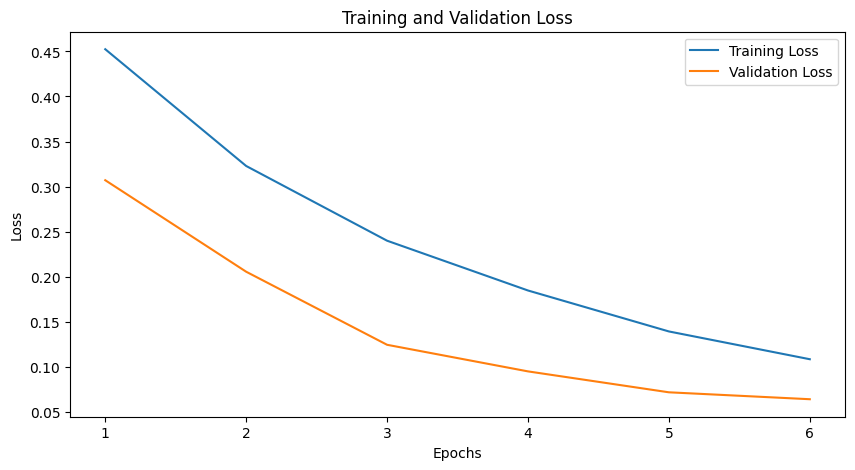

In [62]:

# Plotting the losses after training
plt.figure(figsize=(10, 5))
plt.plot(range(1, 7), train_losses, label='Training Loss')
plt.plot(range(1, 7), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [ ]:
test_dataset = EssayDataset(test_essays, test_scores, scaled_features_test_df, tokenizer)
test_dataloader = DataLoader(test_dataset, batch_size=4)

In [ ]:
torch.save(model.state_dict(), 'model_with_all_sets_2.pt')

In [ ]:
model.load_state_dict(torch.load('model_with_all_sets_2.pt', map_location=device))

<ipython-input-50-8f09ee6a5f8a>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_with_all_sets_2.pt', map_location=device))


<All keys matched successfully>

In [64]:
score_ranges = {
    1: (2, 12),  # Essay Set 1
    2: (2, 10),  # Essay Set 2
    3: (0, 3),   # Essay Set 3
    4: (0, 3),   # Essay Set 4
    5: (0, 4),   # Essay Set 5
    6: (0, 4),   # Essay Set 6
    7: (0, 30),  # Essay Set 7
    8: (0, 60)   # Essay Set 8
}

def inverse_min_max_scaling(predicted_val, essay_set):
    if essay_set in score_ranges:
        min_value, max_value = score_ranges[essay_set]

        if max_value != min_value:  # Avoid division by zero
            scale_up_predicted = predicted_val* (max_value - min_value) + min_value
        else:
            scale_up_predicted = min_value  # If all values were the same, original value is min_value
    else:
        raise ValueError(f"Invalid essay set number: {essay_set}")

    return scale_up_predicted


In [76]:
from sklearn.metrics import cohen_kappa_score
# Set model to evaluation mode
model.eval()

# Initialize variables for evaluation
all_predictions = []
all_targets = []
eval_loss = 0

# Disable gradient calculations for testing
with torch.no_grad():
    for batch in test_dataloader:
        # Extract inputs and move to the appropriate device
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        overall_scores = batch["scaled_score"].to(device)
        actual_score = batch["original_score"]
        essay_sets = batch["meta"][1]
        features = batch["features"].to(device)

        # Get predictions from the model
        outputs = model(input_ids, attention_mask=attention_mask, features=features)
        # Calculate the evaluation loss for this batch
        eval_loss += criterion(outputs.squeeze(), overall_scores.squeeze()).item()

        outputs_squeeze = outputs.squeeze().cpu().numpy()
        essay_setss = essay_sets.cpu().numpy()

        # Collect predictions and actual targets for further evaluation
        for i in range(len(outputs_squeeze)):
            scale_up_score = inverse_min_max_scaling(outputs_squeeze[i], essay_setss[i])
            all_predictions.append(scale_up_score)  # Assuming the last column is the overall score
        all_targets.extend(actual_score.numpy())

# Calculate the average evaluation loss over all batches
avg_eval_loss = eval_loss / len(test_dataloader)
print(f'Validation Loss: {avg_eval_loss}')

# Convert predictions and targets to numpy arrays for QWK calculation
all_predictions = np.array(all_predictions).flatten()
all_targets = np.array(all_targets).flatten()

# Round predictions to the nearest integer for QWK
all_predictions_rounded = np.rint(all_predictions).astype(int)
all_targets_int = all_targets.astype(int)

# Calculate QWK for the overall score
qwk_overall = cohen_kappa_score(all_targets_int, all_predictions_rounded, weights="linear")
print(f'QWK Overall: {qwk_overall}')


Validation Loss: 0.05041249355792633
QWK Overall: 0.7248529256904719


In [71]:
all_targets_int[:50], all_predictions_rounded[:50]

(array([ 3, 16,  6,  1,  2, 16,  2,  1,  0,  3,  3, 33,  2,  0,  1,  3,  8,
         1,  1,  8,  2,  3,  2,  4,  3,  1,  1,  9,  3,  1,  5,  4,  2,  3,
        40,  1,  5,  2,  9,  3,  9,  1,  1,  2,  3,  1, 10,  2,  8,  2]),
 array([ 3,  9,  5,  1,  2, 13,  1,  1,  0,  2,  3, 23,  1,  0,  1,  2,  7,
         0,  1,  6,  2,  2,  2,  2,  2,  1,  1,  6,  2,  1,  4,  3,  2,  1,
        33,  0,  4,  2,  7,  2,  8,  1,  1,  1,  1,  1,  7,  1,  5,  1]))

In [75]:
cohen_kappa_score(all_targets_int, all_predictions_rounded)

0.20351305969660538

In [ ]:
model.eval()
index = 11
essay = test_essays.iloc[index]
score = test_scores.iloc[index]
essay_set = test_scores.iloc[index]["essay_set"]
feature = scaled_features_test_df.iloc[index]
def predict_essay(essay, model, tokenizer, device, features):
    model.eval()
    inputs = tokenizer(essay, return_tensors='pt', padding=True, truncation=True, max_length=512)
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']
    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    feature_tensor = torch.tensor(features.values, dtype=torch.float32)
    features = feature_tensor.unsqueeze(0).to(device, dtype=torch.float)
    print(features.shape)

    with torch.no_grad():
      overall = model(input_ids=input_ids, attention_mask=attention_mask, features=features)
      predicted_overall = overall.squeeze().cpu().numpy()



    return predicted_overall

predicted_overall  = predict_essay(essay, model, tokenizer, device, feature)

scaled_up_predicted = inverse_min_max_scaling(predicted_overall, test_scores.iloc[index]["essay_set"])
print("predicted score \n ", scaled_up_predicted)
print("scaled predicted score \n ", predicted_overall)
print(test_essays.iloc[index])

print("\n")
print("actual: ", score)

torch.Size([1, 15])
predicted score 
  15.750163793563843
scaled predicted score 
  0.52500546
When most people think of patience they think of waiting. But that’s only half of it. Patience is waiting with out complaining, like when I went to the @ORGANIZATION1. It was about a five hour drive. I know that doesn’t seem like a lot but I @CAPS1 corridor. I just @CAPS1 them pure and simple. But me and my brother didn’t complain, mainly because the knight before our mom said two complained well sit with her in the hotel room the whole time. Isnt that scary,” so we finally go there .The week was fun, we ate good food played sweet games and wen’t to an awsome  museum. But on the ride back it was another trial of patience, even more so because we got in an accident.


actual:  scaled_score      0.6
overall_score    18.0
essay_set         7.0
Name: 11410, dtype: float64


In [ ]:
for i in range(10):
  essay = test_essays.iloc[i]
  score = test_scores.iloc[i]
  essay_set = test_scores.iloc[index]["essay_set"]
  feature = scaled_features_test_df.iloc[index]
  predicted = predict_essay(essay, model, tokenizer, device, feature)
  scaled_up_predicted = inverse_min_max_scaling(predicted, test_scores.iloc[i]["essay_set"])
  print(i, "\n")
  print("predicted score \n ", np.round(scaled_up_predicted))
  print("scaled predicted score \n ", predicted)
  print(test_essays.iloc[index])

  print("\n")
  print("actual: ", score)
  print('---------------------------------')

torch.Size([1, 15])
0 

predicted score 
  1.0
scaled predicted score 
  0.35745573
When most people think of patience they think of waiting. But that’s only half of it. Patience is waiting with out complaining, like when I went to the @ORGANIZATION1. It was about a five hour drive. I know that doesn’t seem like a lot but I @CAPS1 corridor. I just @CAPS1 them pure and simple. But me and my brother didn’t complain, mainly because the knight before our mom said two complained well sit with her in the hotel room the whole time. Isnt that scary,” so we finally go there .The week was fun, we ate good food played sweet games and wen’t to an awsome  museum. But on the ride back it was another trial of patience, even more so because we got in an accident.


actual:  scaled_score     0.333333
overall_score    1.000000
essay_set        3.000000
Name: 4999, dtype: float64
---------------------------------
torch.Size([1, 15])
1 

predicted score 
  3.0
scaled predicted score 
  0.84502304
When mos